# Simple RNN Scratch vs. Keras

This notebook compares the RNN Scratch implementation with Keras's RNN implementation.

## Import Library

In [14]:
import sys
import os

sys.path.append(os.path.abspath('../../../'))

In [15]:
from src.rnn.preprocessing import TextPreprocessor
from src.rnn.keras import RNNKerasModel
from src.rnn.model import RNNModel
from src.rnn.utils import load_nusax_data
import matplotlib.pyplot as plt

## Preparation

In [16]:
FOLDER_PATH = "../../../data/nusax"
OUTPUT_PATH = "../../../src/rnn/output"
WEIGHTS_FILE = "model_weights.npz"

### Load Data from CSV

In [17]:
train_texts, train_labels = load_nusax_data(FOLDER_PATH + "/train.csv")
valid_texts, valid_labels = load_nusax_data(FOLDER_PATH + "/valid.csv")
test_texts, test_labels = load_nusax_data(FOLDER_PATH + "/test.csv")

### Preprocess Data

In [18]:
preprocessor = TextPreprocessor(
        max_tokens=5000, output_sequence_length=54, embedding_dim=100
    )

preprocessor.fit(train_texts)

train_sequences = preprocessor.preprocess(train_texts)
valid_sequences = preprocessor.preprocess(valid_texts)
test_sequences = preprocessor.preprocess(test_texts)

## Keras Model Training

In [19]:
EPOCHS = 10
BATCH_SIZE = 128

In [20]:
keras_model = RNNKerasModel(
    vocab_size=preprocessor.get_vocab_size(),
    embedding_dim=100,
    rnn_units=128,
    dropout_rate=0.2,
    bidirectional=True,
)

history = keras_model.model.fit(
    train_sequences,
    train_labels,
    validation_data=(valid_sequences, valid_labels),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.3773 - loss: 1.0858 - val_accuracy: 0.4500 - val_loss: 1.0405
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5952 - loss: 0.8826 - val_accuracy: 0.5100 - val_loss: 0.9681
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7270 - loss: 0.7002 - val_accuracy: 0.4900 - val_loss: 0.9915
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8848 - loss: 0.5253 - val_accuracy: 0.4700 - val_loss: 1.0504
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9669 - loss: 0.3081 - val_accuracy: 0.5200 - val_loss: 0.9756
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9829 - loss: 0.1578 - val_accuracy: 0.5000 - val_loss: 1.0664
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9979 - loss: 0.0604 - val_accuracy: 0.4300 - val_loss: 1.1702
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9987 - loss: 0.0322 - val_accuracy: 0.4900 - val_loss: 1.2263


### Save model's weights

In [21]:
weights_path = os.path.join(OUTPUT_PATH, WEIGHTS_FILE)
keras_model.save_weights(weights_path)

## Scratch Model

In [22]:
scratch_model = RNNModel(
    vocab_size=preprocessor.get_vocab_size(),
    embedding_dim=100,
    rnn_units=128,
    dropout_rate=0.2,
    bidirectional=True,
)

scratch_model.load_weights(weights_path)

## Model Evaluation

### Training vs Validation Loss Keras Model

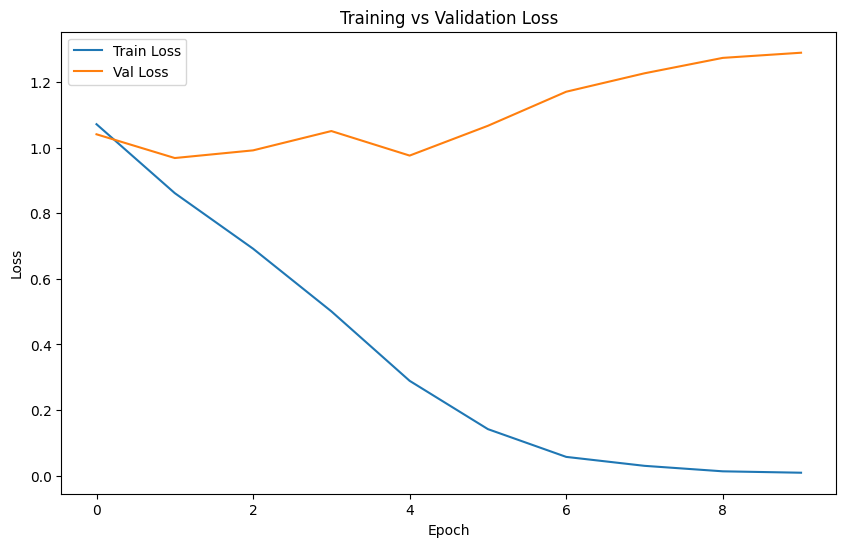

In [23]:

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### F1 Score Scratch vs Keras

In [24]:
keras_f1 = keras_model.evaluate(test_sequences, test_labels)
scratch_f1 = scratch_model.evaluate(test_sequences, test_labels)

print(f"Keras F1 Score: {keras_f1}")
print(f"From-scratch F1 Score: {scratch_f1:}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Keras F1 Score: 0.5420991558764415
From-scratch F1 Score: 0.5420991558764415
